<a href="https://colab.research.google.com/github/Aaryant31/Credit-Card-Default-Prediction/blob/main/Team_Final_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data='https://github.com/Aaryant31/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true'


In [3]:
pd.read_excel(data)

Unnamed: 0         X1  ...       X23                           Y
0             ID  LIMIT_BAL  ...  PAY_AMT6  default payment next month
1              1      20000  ...         0                           1
2              2     120000  ...      2000                           1
3              3      90000  ...      5000                           0
4              4      50000  ...      1000                           0
...          ...        ...  ...       ...                         ...
29996      29996     220000  ...      1000                           0
29997      29997     150000  ...         0                           0
29998      29998      30000  ...      3100                           1
29999      29999      80000  ...      1804                           1
30000      30000      50000  ...      1000                           1

[30001 rows x 25 columns]

In [4]:
#reading data
df=pd.read_excel(data,header=1)

# Data inspection

In [5]:
df.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0   1      20000    2  ...         0         0                           1
1   2     120000    2  ...         0      2000                           1
2   3      90000    2  ...      1000      5000                           0
3   4      50000    2  ...      1069      1000                           0
4   5      50000    1  ...       689       679                           0

[5 rows x 25 columns]

In [6]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null value found**

In [8]:
#describing data
df.describe().transpose()

count           mean  ...        75%        max
ID                          30000.0   15000.500000  ...   22500.25    30000.0
LIMIT_BAL                   30000.0  167484.322667  ...  240000.00  1000000.0
SEX                         30000.0       1.603733  ...       2.00        2.0
EDUCATION                   30000.0       1.853133  ...       2.00        6.0
MARRIAGE                    30000.0       1.551867  ...       2.00        3.0
AGE                         30000.0      35.485500  ...      41.00       79.0
PAY_0                       30000.0      -0.016700  ...       0.00        8.0
PAY_2                       30000.0      -0.133767  ...       0.00        8.0
PAY_3                       30000.0      -0.166200  ...       0.00        8.0
PAY_4                       30000.0      -0.220667  ...       0.00        8.0
PAY_5                       30000.0      -0.266200  ...       0.00        8.0
PAY_6                       30000.0      -0.291100  ...       0.00        8.0
BILL_AMT1                   30000.0   51223.330900  ...   67091.00   964511.0
BILL_AMT2                   30000.0   49179.075167  ...   64006.25   983931.0
BILL_AMT3                   30000.0   47013.154800  ...   60164.75  1664089.0
BILL_AMT4                   30000.0   43262.948967  ...   54506.00   891586.0
BILL_AMT5                   30000.0   40311.400967  ...   50190.50   927171.0
BILL_AMT6                   30000.0   38871.760400  ...   49198.25   961664.0
PAY_AMT1                    30000.0    5663.580500  ...    5006.00   873552.0
PAY_AMT2                    30000.0    5921.163500  ...    5000.00  1684259.0
PAY_AMT3                    30000.0    5225.681500  ...    4505.00   896040.0
PAY_AMT4                    30000.0    4826.076867  ...    4013.25   621000.0
PAY_AMT5                    30000.0    4799.387633  ...    4031.50   426529.0
PAY_AMT6                    30000.0    5215.502567  ...    4000.00   528666.0
default payment next month  30000.0       0.221200  ...       0.00        1.0

[25 rows x 8 columns]

In [9]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [10]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [11]:
#viewing Data

df.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT5  PAY_AMT6  default payment next month
0      20000    2          2  ...         0         0                           1
1     120000    2          2  ...         0      2000                           1
2      90000    2          2  ...      1000      5000                           0
3      50000    2          2  ...      1069      1000                           0
4      50000    1          2  ...       689       679                           0

[5 rows x 24 columns]

# Data cleaning

In [12]:
df['LIMIT_BAL'].max()

1000000

In [13]:
df['LIMIT_BAL'].min()

10000

In [14]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [15]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [16]:
df.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_MAY  PAY_AMT_APR  Defaulters
0      20000    2          2  ...            0            0           1
1     120000    2          2  ...            0         2000           1
2      90000    2          2  ...         1000         5000           0
3      50000    2          2  ...         1069         1000           0
4      50000    1          2  ...          689          679           0

[5 rows x 24 columns]

### Looking for Outlier Using Isolation Forest

In [17]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#creating instance of minmaxscaler
minmax = MinMaxScaler(feature_range=(0, 1))
scale_df = minmax.fit_transform(df.drop('Defaulters',axis=1))

In [18]:
#imprting IsolationForeest for outlier detection
from sklearn.ensemble import IsolationForest

In [19]:
#creating instance of isolation forest
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(scale_df)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(scale_df)

In [20]:
df.head()

LIMIT_BAL  SEX  ...  multivariate_anomaly_score  multivariate_outlier
0      20000    2  ...                    0.193236                     1
1     120000    2  ...                    0.214444                     1
2      90000    2  ...                    0.272661                     1
3      50000    2  ...                    0.265480                     1
4      50000    1  ...                    0.175220                     1

[5 rows x 26 columns]

In [21]:
#looking the outlier
df[(df['multivariate_outlier'] == -1)]

LIMIT_BAL  SEX  ...  multivariate_anomaly_score  multivariate_outlier
6         500000    1  ...                   -0.047298                    -1
59        400000    2  ...                   -0.018764                    -1
102       480000    1  ...                   -0.075574                    -1
214       470000    1  ...                   -0.025251                    -1
360       500000    2  ...                   -0.073183                    -1
...          ...  ...  ...                         ...                   ...
29605     500000    1  ...                   -0.042915                    -1
29820     400000    1  ...                   -0.053828                    -1
29837     500000    1  ...                   -0.029139                    -1
29883     420000    1  ...                   -0.026219                    -1
29963     610000    1  ...                   -0.134108                    -1

[300 rows x 26 columns]

In [22]:
#removing Outliers
df=df.drop( df[ df['multivariate_outlier'] == -1 ].index)

In [23]:
#checking the shape of df after removing outlier
df.shape

(29700, 26)

# Exploratory Data Analysis and feature Engineering

In [24]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23152
1     6548
Name: Defaulters, dtype: int64

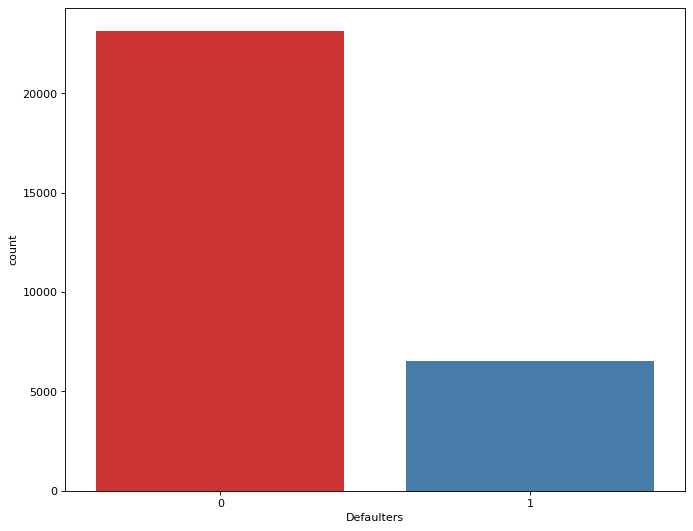

In [25]:
#visualizing dependent variable
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

**We can see that we have quite imbalance dataset**

## Bivariate Analysis

In [26]:
#analysing categorical variable
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [27]:
#creating different df for categorical variable
df_cat = df[categorical_features]


In [28]:
#checking shape of categorical variable
df_cat.shape

(29700, 3)

In [29]:
#looking into categorical df
df_cat.head()

SEX  EDUCATION  MARRIAGE
0    2          2         1
1    2          2         2
2    2          2         2
3    2          2         1
4    1          2         1

In [30]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    17960
1    11740
Name: SEX, dtype: int64

count of EDUCATION features

2    13921
1    10437
3     4886
5      271
4      123
6       48
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15837
1    13487
3      322
0       54
Name: MARRIAGE, dtype: int64



In [31]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [32]:
df_cat.head()

SEX   EDUCATION MARRIAGE
0  Female  university  married
1  Female  university   single
2  Female  university   single
3  Female  university  married
4    Male  university  married

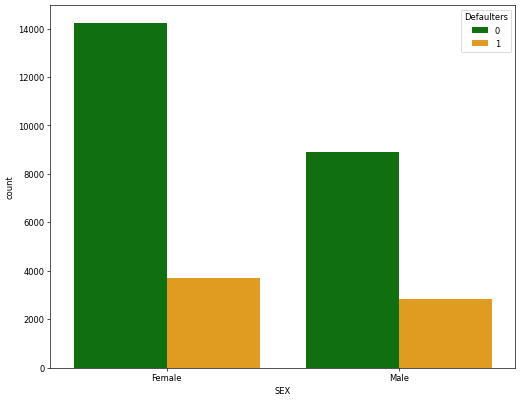

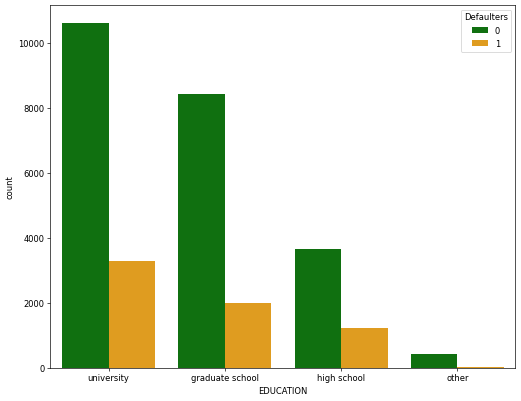

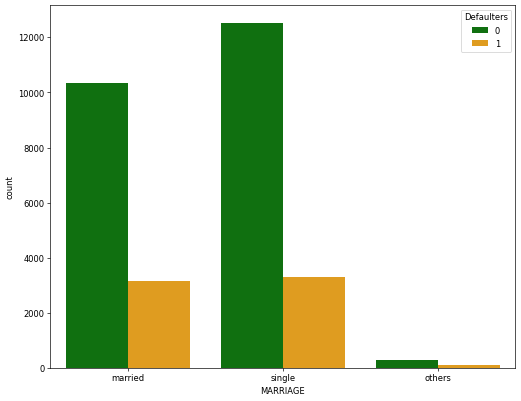

In [33]:
#ploting count plot of  categorical df
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette=["green",'orange'])
  plt.show()

In [34]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    17960
Male      11740
Name: SEX, dtype: int64

count of EDUCATION features

university         13921
graduate school    10437
high school         4886
other                456
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15837
married    13487
others       376
Name: MARRIAGE, dtype: int64



In [35]:
#creating defaulter variable on df_cat
df_cat['Defaulter'] = df['Defaulters']

In [36]:
df_cat.head()

SEX   EDUCATION MARRIAGE  Defaulter
0  Female  university  married          1
1  Female  university   single          1
2  Female  university   single          0
3  Female  university  married          0
4    Male  university  married          0

In [37]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.207071
1    Male   0.240971
         EDUCATION  Defaulter
0  graduate school   0.191722
1      high school   0.251535
2            other   0.070175
3       university   0.236046
  MARRIAGE  Defaulter
0  married   0.233929
1   others   0.236702
2   single   0.208625


### observation
for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

In [38]:
#desribing age variable
df['AGE'].describe()

count    29700.000000
mean        35.435892
std          9.199220
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

### observation
- we can see here min age is 21 and maximum age is 79 in our dataset

In [39]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [40]:
#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

In [41]:
df.head()

LIMIT_BAL  SEX  ...  multivariate_outlier  age_group
0      20000    2  ...                     1      21-30
1     120000    2  ...                     1      21-30
2      90000    2  ...                     1      31-40
3      50000    2  ...                     1      31-40
4      50000    1  ...                     1      51-60

[5 rows x 27 columns]

In [42]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending=False)

21-30         10963
31-40         10604
41-50          5909
51-60          1966
60 & above      258
Name: age_group, dtype: int64

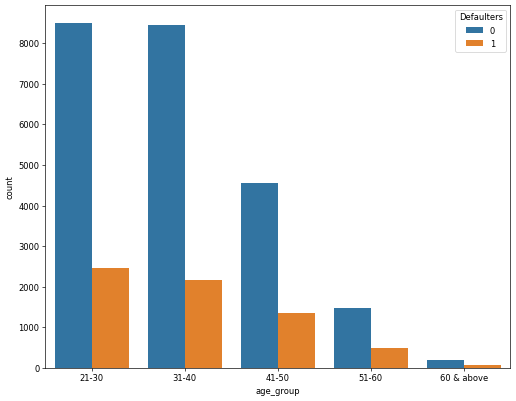

In [43]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters')

### obsevation:
- In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.


In [44]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

age_group  Defaulters
0       21-30    0.224209
1       31-40    0.203697
2       41-50    0.230496
3       51-60    0.252798
4  60 & above    0.275194

### observation
- we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

In [45]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

In [46]:
df.head()

LIMIT_BAL  SEX  ...  multivariate_outlier  age_group
0      20000    2  ...                     1      21-30
1     120000    2  ...                     1      21-30
2      90000    2  ...                     1      31-40
3      50000    2  ...                     1      31-40
4      50000    1  ...                     1      51-60

[5 rows x 26 columns]

In [47]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

PAY_SEPT       PAY_AUG  ...       PAY_MAY       PAY_APR
count  29700.000000  29700.000000  ...  29700.000000  29700.000000
mean      -0.023030     -0.140337  ...     -0.271414     -0.296397
std        1.113999      1.189467  ...      1.132032      1.149251
min       -2.000000     -2.000000  ...     -2.000000     -2.000000
25%       -1.000000     -1.000000  ...     -1.000000     -1.000000
50%        0.000000      0.000000  ...      0.000000      0.000000
75%        0.000000      0.000000  ...      0.000000      0.000000
max        8.000000      8.000000  ...      8.000000      8.000000

[8 rows x 6 columns]

In [48]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

PAY_AMT_SEPT   PAY_AMT_AUG  ...    PAY_AMT_MAY    PAY_AMT_APR
count   29700.000000  2.970000e+04  ...   29700.000000   29700.000000
mean     5359.661818  5.408550e+03  ...    4553.933872    4823.623670
std     14282.084238  1.620293e+04  ...   14114.856319   15656.614427
min         0.000000  0.000000e+00  ...       0.000000       0.000000
25%       990.000000  8.150000e+02  ...     237.750000     100.000000
50%      2100.000000  2.000000e+03  ...    1500.000000    1500.000000
75%      5000.000000  5.000000e+03  ...    4000.000000    4000.000000
max    505000.000000  1.024516e+06  ...  426529.000000  528666.000000

[8 rows x 6 columns]

In [49]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

BILL_AMT_SEPT   BILL_AMT_AUG  ...   BILL_AMT_MAY   BILL_AMT_APR
count   29700.000000   29700.000000  ...   29700.000000   29700.000000
mean    48175.440943   46158.394949  ...   37495.571347   36253.206431
std     65622.377293   62924.272430  ...   52710.101639   52060.625452
min   -165580.000000  -69777.000000  ...  -81334.000000 -339603.000000
25%      3458.750000    2899.000000  ...    1699.750000    1200.000000
50%     21708.500000   20650.000000  ...   17860.000000   16699.000000
75%     64829.000000   61729.750000  ...   49123.750000   48276.500000
max    746814.000000  512650.000000  ...  514114.000000  499100.000000

[8 rows x 6 columns]

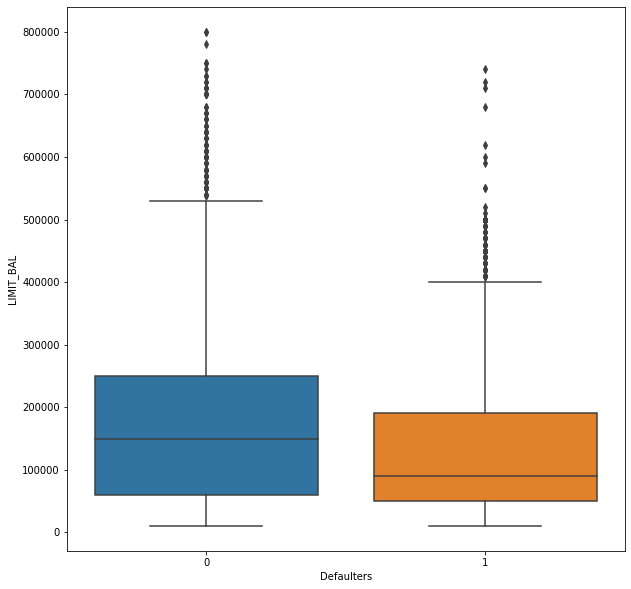

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df)

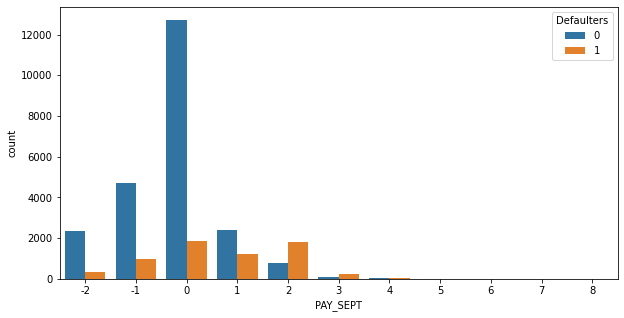

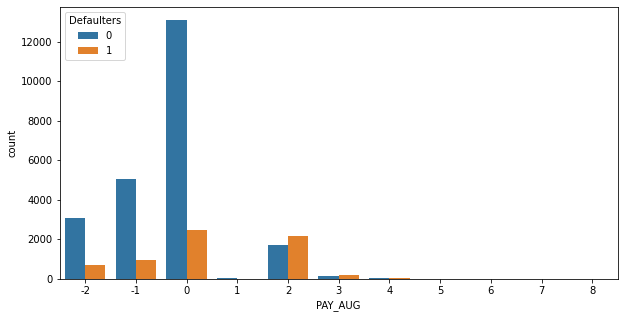

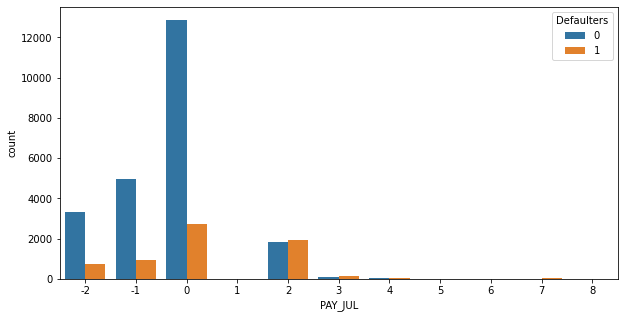

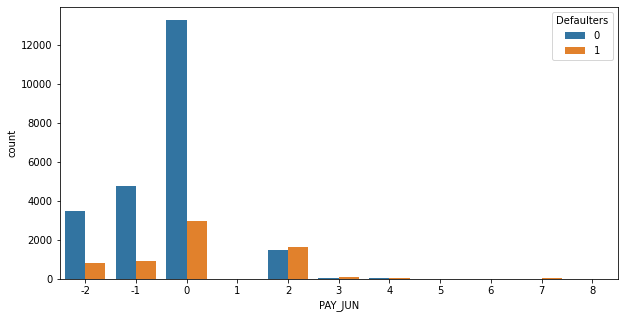

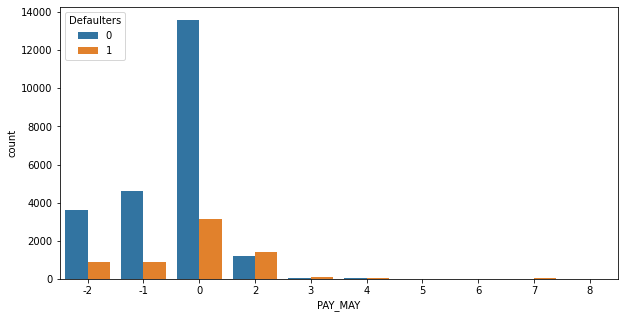

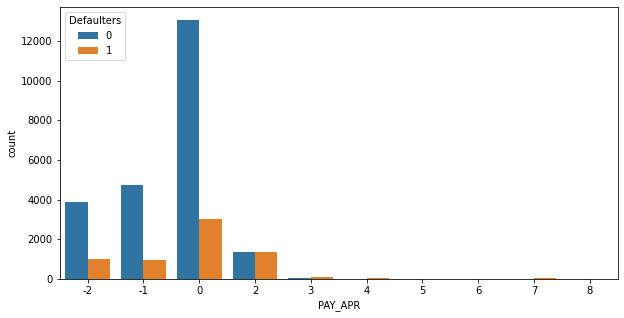

In [51]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

# 

In [52]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29700 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29700 non-null  int64  
 1   SEX                         29700 non-null  int64  
 2   EDUCATION                   29700 non-null  int64  
 3   MARRIAGE                    29700 non-null  int64  
 4   PAY_SEPT                    29700 non-null  int64  
 5   PAY_AUG                     29700 non-null  int64  
 6   PAY_JUL                     29700 non-null  int64  
 7   PAY_JUN                     29700 non-null  int64  
 8   PAY_MAY                     29700 non-null  int64  
 9   PAY_APR                     29700 non-null  int64  
 10  BILL_AMT_SEPT               29700 non-null  int64  
 11  BILL_AMT_AUG                29700 non-null  int64  
 12  BILL_AMT_JUL                29700 non-null  int64  
 13  BILL_AMT_JUN                297

## Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column

In [53]:
#spliting independent Variable
X=df.drop(['Defaulters','multivariate_anomaly_score','multivariate_outlier'],axis=1)

In [54]:
#looking into independent variable
X.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_MAY  PAY_AMT_APR  age_group
0      20000    2          2  ...            0            0      21-30
1     120000    2          2  ...            0         2000      21-30
2      90000    2          2  ...         1000         5000      31-40
3      50000    2          2  ...         1069         1000      31-40
4      50000    1          2  ...          689          679      51-60

[5 rows x 23 columns]

In [55]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [56]:
X.head()

LIMIT_BAL     SEX   EDUCATION  ... PAY_AMT_MAY  PAY_AMT_APR  age_group
0      20000  Female  university  ...           0            0      21-30
1     120000  Female  university  ...           0         2000      21-30
2      90000  Female  university  ...        1000         5000      31-40
3      50000  Female  university  ...        1069         1000      31-40
4      50000    Male  university  ...         689          679      51-60

[5 rows x 23 columns]

In [57]:
# one hot encoding for age group
X=pd.get_dummies(X)

In [58]:
X.head()

LIMIT_BAL  PAY_SEPT  ...  age_group_51-60  age_group_60 & above
0      20000         2  ...                0                     0
1     120000        -1  ...                0                     0
2      90000         0  ...                0                     0
3      50000         0  ...                0                     0
4      50000        -1  ...                1                     0

[5 rows x 33 columns]

In [59]:
#spliting Dependent variable
y=df['Defaulters']

In [60]:
df_final=X.copy()

In [61]:
df_final.head()

LIMIT_BAL  PAY_SEPT  ...  age_group_51-60  age_group_60 & above
0      20000         2  ...                0                     0
1     120000        -1  ...                0                     0
2      90000         0  ...                0                     0
3      50000         0  ...                0                     0
4      50000        -1  ...                1                     0

[5 rows x 33 columns]

In [62]:
df_final['Defaulters']=df['Defaulters']

In [63]:
df_final

LIMIT_BAL  PAY_SEPT  ...  age_group_60 & above  Defaulters
0          20000         2  ...                     0           1
1         120000        -1  ...                     0           1
2          90000         0  ...                     0           0
3          50000         0  ...                     0           0
4          50000        -1  ...                     0           0
...          ...       ...  ...                   ...         ...
29995     220000         0  ...                     0           0
29996     150000        -1  ...                     0           0
29997      30000         4  ...                     0           1
29998      80000         1  ...                     0           1
29999      50000         0  ...                     0           1

[29700 rows x 34 columns]

In [64]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29700
Resampled dataset shape 46304


In [65]:
#now checking the count of dependent variaable after balancing
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23152],
       [    1, 23152]])

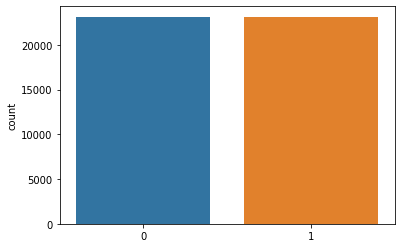

In [66]:
sns.countplot(y_smote)

## Train | Test Split

In [67]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [68]:
#looking into independent variable of train dataset
X_train

array([[ 50000,      0,     -1, ...,      0,      1,      0],
       [ 30000,      0,      0, ...,      0,      0,      0],
       [ 10000,      0,      0, ...,      0,      0,      0],
       ...,
       [190000,      0,      0, ...,      0,      0,      0],
       [ 20000,      1,     -1, ...,      0,      0,      0],
       [ 20000,      0,      0, ...,      0,      0,      0]])

In [69]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Creating Function

In [70]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [71]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))


In [72]:
pip install lime

     |████████████████████████████████| 275 kB 3.5 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=b5338e7f5c222c8d496e7213fbee096c0b6ddb50c981d757d5d81cc7493be446
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [73]:
#  importing lime 
import lime
import lime.lime_tabular

In [74]:
# LIME SECTION

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # creating a data frame to store all the independent features
  X=df_final.drop(dependent_var,axis=1)
  # fetching all the features name from independent variable
  feature_names =list(X.columns)

  # setting up the lime tablular 
  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='classification')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict_proba, num_features=num_features)
  # showing the lime graph on the screen 
  exp.show_in_notebook(show_table=True)


# creating function to get feature importance 

In [75]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);
   

# Logistic Regression

In [76]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [77]:
#creating Instance of Logistic Regression

log_model= LogisticRegression()

In [78]:
#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.0118min 

score matrix for train
********************************************************************************
The accuracy is  0.8665917991246257
The precision is  0.9536130369523265
The recall is  0.7700565623917811
The f1 is  0.8520611808283042
the auc  is  0.8663809992742724

confusion_matrix 
  [[16753   649]
 [ 3984 13342]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17402
           1       0.95      0.77      0.85     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8635107118175536
The precision is  0.9520868824531517
The recall is  0.7674219018194302
The f1 is  0.8498384337578407
the auc  is  0.8641457335184107

confusion_matrix 
  [[

### implementing GridSearch for Hyperparameter Tuning

In [79]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [80]:
#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [81]:
#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    9.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.9s finished


Training time: 0.1729min 

score matrix for train
********************************************************************************
The accuracy is  0.8673404745450357
The precision is  0.9502300884955752
The recall is  0.7746739004963639
The f1 is  0.8535181711233347
the auc  is  0.8671381225272303

confusion_matrix 
  [[16699   703]
 [ 3904 13422]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17402
           1       0.95      0.77      0.85     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8641154111955771
The precision is  0.9483449293695974
The recall is  0.7720562993477514
The f1 is  0.8511685116851169
the auc  is  0.8647238018477889

confusion_matrix 
  [[

In [82]:
#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_

array([[-0.06878422,  0.5916114 ,  0.10250144,  0.04268249,  0.04981706,
         0.05711287,  0.00676246, -0.25325549,  0.03462686,  0.1014659 ,
         0.00429578, -0.05894209,  0.04549925, -0.14401205, -0.1769606 ,
        -0.05657636, -0.0509784 , -0.06247501, -0.06050097, -1.26503885,
        -1.14899707, -1.10522753, -0.87704513, -0.36878835, -1.24959355,
        -1.07956646, -0.22883169, -1.19130346, -1.26879408, -1.24244423,
        -0.97621743, -0.57972598, -0.20732027]])

In [83]:
optimal_log_model=grid_log_model.best_estimator_.coef_

In [84]:
#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

In [85]:
#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [86]:
imp_feat

Features  Importance
28            age_group_21-30    1.268794
19                 SEX_Female    1.265039
24       EDUCATION_university    1.249594
29            age_group_31-40    1.242444
27            MARRIAGE_single    1.191303
20                   SEX_Male    1.148997
21  EDUCATION_graduate school    1.105228
25           MARRIAGE_married    1.079566
30            age_group_41-50    0.976217
22      EDUCATION_high school    0.877045

==========================Features Importance============================

 [[-0.06878422  0.5916114   0.10250144  0.04268249  0.04981706  0.05711287
   0.00676246 -0.25325549  0.03462686  0.1014659   0.00429578 -0.05894209
   0.04549925 -0.14401205 -0.1769606  -0.05657636 -0.0509784  -0.06247501
  -0.06050097 -1.26503885 -1.14899707 -1.10522753 -0.87704513 -0.36878835
  -1.24959355 -1.07956646 -0.22883169 -1.19130346 -1.26879408 -1.24244423
  -0.97621743 -0.57972598 -0.20732027]]



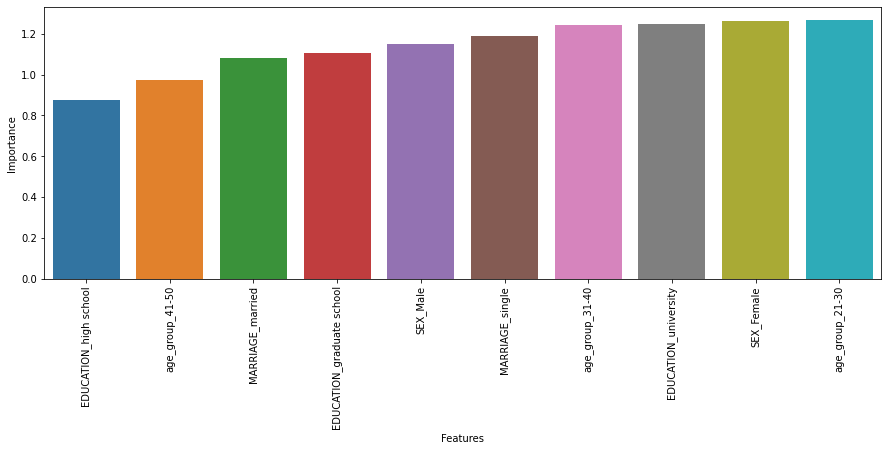

In [87]:
#visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'==========================Features Importance============================\n\n {optimal_log_model}\
\n=========================================================================\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

In [88]:
#geting the best Paramater of model
grid_log_model.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

# Decision Tree

In [89]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0099min 

score matrix for train
********************************************************************************
The accuracy is  0.8278334485141673
The precision is  0.906265664160401
The recall is  0.7304628881449844
The f1 is  0.8089226934262248
the auc  is  0.8276208246034656

confusion_matrix 
  [[16093  1309]
 [ 4670 12656]]

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.92      0.84     17402
           1       0.91      0.73      0.81     17326

    accuracy                           0.83     34728
   macro avg       0.84      0.83      0.83     34728
weighted avg       0.84      0.83      0.83     34728



score matrix for test
********************************************************************************
The accuracy is  0.8236005528680027
The precision is  0.9020399490012749
The recall is  0.7286302780638517
The f1 is  0.806114698063046
the auc  is  0.8242281825101868

confusion_matrix 
  [[52

In [90]:
DecisionTree.feature_importances_

array([0.00209203, 0.2231336 , 0.08428006, 0.01004117, 0.00229071,
       0.        , 0.01818537, 0.        , 0.00469977, 0.        ,
       0.        , 0.00695375, 0.        , 0.02014197, 0.01908456,
       0.00389154, 0.        , 0.        , 0.        , 0.01558395,
       0.09762856, 0.00751975, 0.0262607 , 0.01748023, 0.00920715,
       0.25336934, 0.05777148, 0.05537951, 0.01153164, 0.00665907,
       0.01521197, 0.01955056, 0.01205156])

==========================Features Importance============================

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  



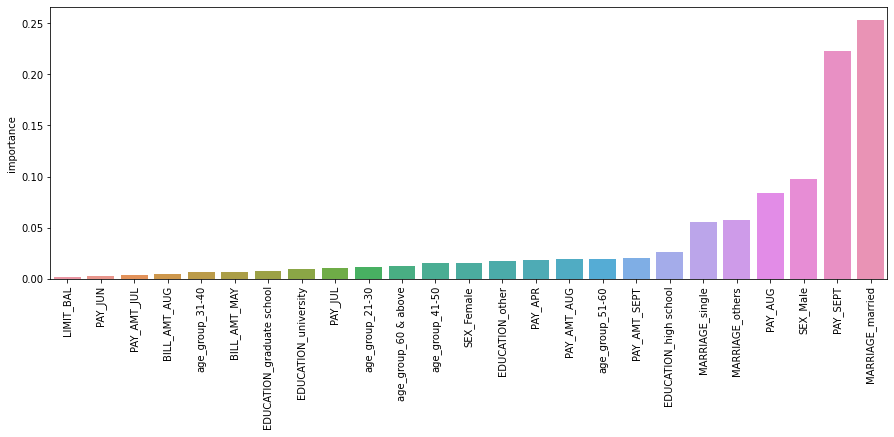

In [91]:
get_features_importance(DecisionTree,X_train)

# Random Forest

In [92]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [93]:
# training and evaluating the Random forest
run_and_evaluate_model(rfc_model,X_train, X_test, y_train, y_test)

Training time: 0.1398min 

score matrix for train
********************************************************************************
The accuracy is  0.9982722874913614
The precision is  0.9985562485562486
The recall is  0.9979799145792451
The f1 is  0.9982679983834651
the auc  is  0.9982716490491904

confusion_matrix 
  [[17377    25]
 [   35 17291]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17402
           1       1.00      1.00      1.00     17326

    accuracy                           1.00     34728
   macro avg       1.00      1.00      1.00     34728
weighted avg       1.00      1.00      1.00     34728



score matrix for test
********************************************************************************
The accuracy is  0.8759502418797512
The precision is  0.9042357274401474
The recall is  0.8427737727428768
The f1 is  0.8724235963041934
the auc  is  0.8761694950670906

confusion_matrix 
  [[

### implementing gridsearch for hyperparameter tuning in Random Forest

In [94]:
# finding the best parameters for rfc_model by gridsearchcv
grid_values = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=3,verbose=5,n_jobs=-1)

In [95]:
# training and evaluating the Random forest with hyperparameter tuing
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.6min finished


Training time: 2.8457min 

score matrix for train
********************************************************************************
The accuracy is  0.9458074176457038
The precision is  0.9865171370967742
The recall is  0.9037285005194505
The f1 is  0.9433098379420447
the auc  is  0.9457155317216261

confusion_matrix 
  [[17188   214]
 [ 1668 15658]]

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17402
           1       0.99      0.90      0.94     17326

    accuracy                           0.95     34728
   macro avg       0.95      0.95      0.95     34728
weighted avg       0.95      0.95      0.95     34728



score matrix for test
********************************************************************************
The accuracy is  0.8712854181064271
The precision is  0.9052336448598131
The recall is  0.8312736010985239
The f1 is  0.8666785969935576
the auc  is  0.8715498440275228

confusion_matrix 
  [[

In [96]:
#getting the best paramater of random forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 125}

In [97]:
#getting the best estimator for random forest
grid_rfc_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
#storing best estimator in varibale
optimal__rfc_model=grid_rfc_model.best_estimator_

==========================Features Importance============================

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  



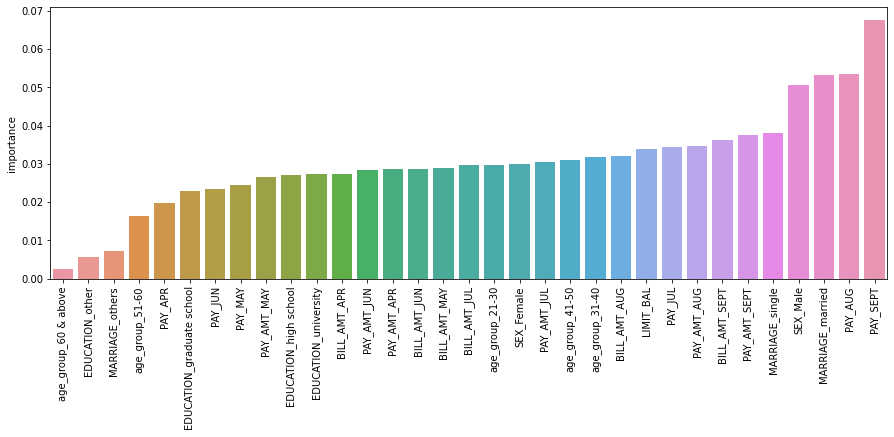

In [99]:
#visualizing the feature importance of variable for random forest
get_features_importance(optimal__rfc_model,X_train)

# Support Vector Machine

In [100]:
#importing SVM
from sklearn.svm import SVC
svc_model=SVC()

In [101]:
# training and evaluating the SVC model 
run_and_evaluate_model(svc_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 1.2172min 

score matrix for train
********************************************************************************
The accuracy is  0.875460723335637
The precision is  0.9455754335458222
The recall is  0.7962022394089807
The f1 is  0.8644837850540498
the auc  is  0.8752876499883657

confusion_matrix 
  [[16608   794]
 [ 3531 13795]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     17402
           1       0.95      0.80      0.86     17326

    accuracy                           0.88     34728
   macro avg       0.89      0.88      0.87     34728
weighted avg       0.88      0.88      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8680891499654457
The precision is  0.9423749742745421
The recall is  0.7859594919327154
The f1 is  0.8570893776321946
the auc  is  0.8686319198794012

confusion_matrix 
  [[5

### Hyperparameter tuning for SVM

In [102]:
params={'C':[0.1,1,10],'kernel':['rbf']}
svc_grid_model= GridSearchCV(svc_model,param_grid=params,scoring='recall')

In [103]:
run_and_evaluate_model(svc_grid_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 15.8202min 

score matrix for train
********************************************************************************
The accuracy is  0.8910677263303386
The precision is  0.9528522704474018
The recall is  0.8223479164261803
The f1 is  0.882803060813532
the auc  is  0.8909176658329041

confusion_matrix 
  [[16697   705]
 [ 3078 14248]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     17402
           1       0.95      0.82      0.88     17326

    accuracy                           0.89     34728
   macro avg       0.90      0.89      0.89     34728
weighted avg       0.90      0.89      0.89     34728



score matrix for test
********************************************************************************
The accuracy is  0.867743607463718
The precision is  0.9292424545272836
The recall is  0.7979745966357706
The f1 is  0.8586203712254132
the auc  is  0.8682046896222331

confusion_matrix 
  [[5

In [104]:
#getting the best estimator
svc_grid_model.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
#getting the best parameter
svc_grid_model.best_params_

{'C': 10, 'kernel': 'rbf'}

---
#XGboost
---

In [106]:
from xgboost import XGBClassifier

In [107]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [108]:
# training and evaluating the Xgboost model
run_and_evaluate_model(xgboost_model,X_train,X_test,y_train,y_test)

Training time: 0.0771min 

score matrix for train
********************************************************************************
The accuracy is  0.872581202487906
The precision is  0.9271005760444945
The recall is  0.8081496017545885
The f1 is  0.8635480588362269
the auc  is  0.8724405059686632

confusion_matrix 
  [[16301  1101]
 [ 3324 14002]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     17402
           1       0.93      0.81      0.86     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8679163787145819
The precision is  0.9225172074729597
The recall is  0.8051836594576038
The f1 is  0.8598661900834021
the auc  is  0.8683309601635845

confusion_matrix 
  [[5

### Hyperparameter tuning for Xgboost

In [109]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [110]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.4min finished


Training time: 4.797min 

score matrix for train
********************************************************************************
The accuracy is  0.950299470168164
The precision is  0.9899497487437185
The recall is  0.9096156066027935
The f1 is  0.9480839800276725
the auc  is  0.950210630562631

confusion_matrix 
  [[17242   160]
 [ 1566 15760]]

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     17402
           1       0.99      0.91      0.95     17326

    accuracy                           0.95     34728
   macro avg       0.95      0.95      0.95     34728
weighted avg       0.95      0.95      0.95     34728



score matrix for test
********************************************************************************
The accuracy is  0.8745680718728404
The precision is  0.9248251748251748
The recall is  0.8171987641606591
The f1 is  0.8676872607982504
the auc  is  0.8749472081672861

confusion_matrix 
  [[536

In [111]:
#getting the best estimator
grid_xgboost_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [112]:
optimal_xgboost_model=grid_xgboost_model.best_estimator_

==========================Features Importance============================

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)  



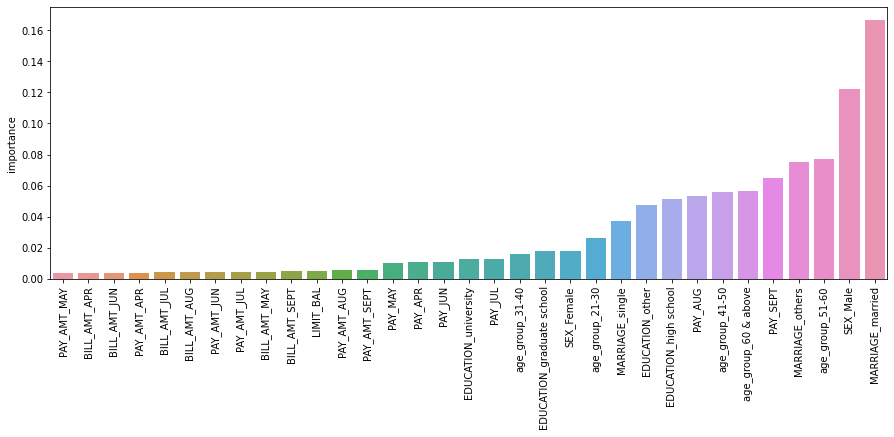

In [113]:
#visaulizing feature importance
get_features_importance(optimal_xgboost_model,X_train)

---
# CatBoost
---

In [114]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 23 kB/s 


In [115]:
from catboost import CatBoostClassifier

In [116]:
cb_model=CatBoostClassifier(verbose=0)

In [117]:
cb_model=CatBoostClassifier()

In [118]:
# training and evaluating the cb model
run_and_evaluate_model(cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.04686
0:	learn: 0.6498824	total: 63.7ms	remaining: 1m 3s
1:	learn: 0.6135336	total: 79.7ms	remaining: 39.8s
2:	learn: 0.5878603	total: 95.1ms	remaining: 31.6s
3:	learn: 0.5659475	total: 109ms	remaining: 27s
4:	learn: 0.5550990	total: 123ms	remaining: 24.4s
5:	learn: 0.5411833	total: 141ms	remaining: 23.4s
6:	learn: 0.5331986	total: 157ms	remaining: 22.3s
7:	learn: 0.5206482	total: 174ms	remaining: 21.6s
8:	learn: 0.4999546	total: 190ms	remaining: 21s
9:	learn: 0.4844749	total: 210ms	remaining: 20.8s
10:	learn: 0.4758092	total: 228ms	remaining: 20.5s
11:	learn: 0.4626849	total: 245ms	remaining: 20.2s
12:	learn: 0.4562198	total: 261ms	remaining: 19.8s
13:	learn: 0.4458479	total: 277ms	remaining: 19.5s
14:	learn: 0.4339660	total: 292ms	remaining: 19.2s
15:	learn: 0.4258141	total: 306ms	remaining: 18.8s
16:	learn: 0.4176362	total: 321ms	remaining: 18.6s
17:	learn: 0.4147978	total: 338ms	remaining: 18.5s
18:	learn: 0.4122024	total: 352ms	remaining: 18.2s
19:	learn: 0.

### Hyperparameter tuning for Catboost

In [119]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_cb_model=GridSearchCV(estimator=cb_model,param_grid=params,cv=3,scoring='recall',verbose=0,n_jobs=-1)

In [120]:
# training and evaluating the catboost model with hyperparameter tuing
run_and_evaluate_model(grid_cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.266888
0:	learn: 0.5261093	total: 47.1ms	remaining: 7.02s
1:	learn: 0.4470775	total: 86.5ms	remaining: 6.4s
2:	learn: 0.3935472	total: 125ms	remaining: 6.13s
3:	learn: 0.3633720	total: 163ms	remaining: 5.94s
4:	learn: 0.3392221	total: 202ms	remaining: 5.86s
5:	learn: 0.3333009	total: 238ms	remaining: 5.72s
6:	learn: 0.3273639	total: 277ms	remaining: 5.66s
7:	learn: 0.3186170	total: 314ms	remaining: 5.58s
8:	learn: 0.3157711	total: 351ms	remaining: 5.5s
9:	learn: 0.3077401	total: 388ms	remaining: 5.43s
10:	learn: 0.3050491	total: 431ms	remaining: 5.44s
11:	learn: 0.3035444	total: 466ms	remaining: 5.36s
12:	learn: 0.2991437	total: 503ms	remaining: 5.3s
13:	learn: 0.2973057	total: 542ms	remaining: 5.26s
14:	learn: 0.2952633	total: 580ms	remaining: 5.22s
15:	learn: 0.2950694	total: 590ms	remaining: 4.94s
16:	learn: 0.2933162	total: 627ms	remaining: 4.9s
17:	learn: 0.2919729	total: 668ms	remaining: 4.9s
18:	learn: 0.2908629	total: 706ms	remaining: 4.87s
19:	learn: 0.2

In [121]:
#getting the best estimator
optimal_catboost_model=grid_cb_model.best_estimator_

In [122]:
#getting the featre importance
grid_cb_model.best_estimator_.feature_importances_

array([ 2.73782278,  2.87385929,  1.2212212 ,  0.46277339,  0.76553485,
        0.56629382,  0.68052892,  1.89650437,  1.0233408 ,  1.14729394,
        1.24636972,  0.97870321,  1.17493754,  1.73940267,  2.03533874,
        1.50556129,  1.52247334,  1.57233534,  2.07117792,  8.76237969,
        7.50651221,  9.38462729,  7.55784787,  1.53367901, 11.47855702,
        6.4831303 ,  0.58931543,  6.86643437,  4.01565856,  4.04924571,
        3.09356891,  1.33747194,  0.12009858])

==========================Features Importance============================




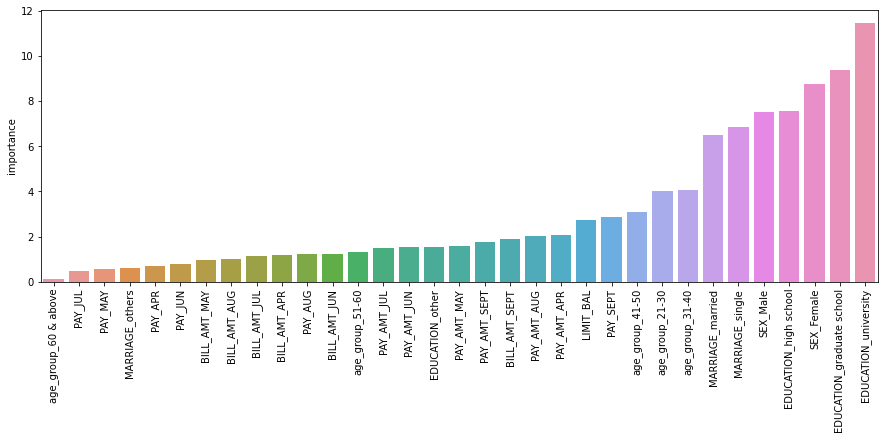

In [123]:
# visualizing feature importance
get_features_importance(optimal_catboost_model,X_train)

In [124]:
grid_cb_model.best_params_

{'max_depth': 9, 'n_estimators': 150}

---
# LightGBM
---

In [125]:
import lightgbm as lgb

In [126]:
lgbc=lgb.LGBMClassifier()

In [127]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc,X_train,X_test,y_train,y_test)

Training time: 0.0194min 

score matrix for train
********************************************************************************
The accuracy is  0.8896855563234278
The precision is  0.9489055951034528
The recall is  0.8232136673207896
The f1 is  0.8816021262787033
the auc  is  0.8895404045143197

confusion_matrix 
  [[16634   768]
 [ 3063 14263]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     17402
           1       0.95      0.82      0.88     17326

    accuracy                           0.89     34728
   macro avg       0.90      0.89      0.89     34728
weighted avg       0.90      0.89      0.89     34728



score matrix for test
********************************************************************************
The accuracy is  0.876123013130615
The precision is  0.9317734958710184
The recall is  0.8134225883968418
The f1 is  0.8685850439882699
the auc  is  0.8765373811549426

confusion_matrix 
  [[5

In [128]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [129]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc_grid,X_train,X_test,y_train,y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   22.4s finished


Training time: 0.3999min 

score matrix for train
********************************************************************************
The accuracy is  0.8984680949090071
The precision is  0.9561681872272908
The recall is  0.8347570125822463
The f1 is  0.8913472205102922
the auc  is  0.898328971754863

confusion_matrix 
  [[16739   663]
 [ 2863 14463]]

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     17402
           1       0.96      0.83      0.89     17326

    accuracy                           0.90     34728
   macro avg       0.91      0.90      0.90     34728
weighted avg       0.90      0.90      0.90     34728



score matrix for test
********************************************************************************
The accuracy is  0.8753455425017277
The precision is  0.9301275760549559
The recall is  0.8134225883968418
The f1 is  0.8678692427433385
the auc  is  0.8757547724592905

confusion_matrix 
  [[5

==========================Features Importance============================

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=15,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)  



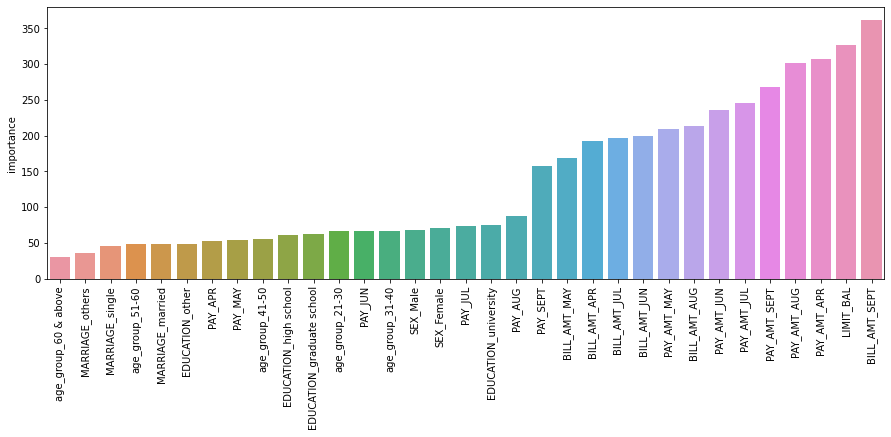

In [130]:
get_features_importance(lgbc_grid.best_estimator_,X_train)

# Model's Score matrix

In [131]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [132]:
# list of all models
model_name=['Logestic Regrestion','grid_log_regg','Desision Tree','Random forest','grid random forest','SVM','Grid SVM','XGboost','Grid Xgboost','CATBoost','Grid Catboost','LightGBM','Grid LightGBM']

In [133]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [134]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [135]:
matrix_df

Models  accuracy  precision    recall        f1   roc_auc
0   Logestic Regrestion  0.863511   0.952087  0.767422  0.849838  0.864146
1         grid_log_regg  0.864115   0.948345  0.772056  0.851169  0.864724
2         Desision Tree  0.823601   0.902040  0.728630  0.806115  0.824228
3         Random forest  0.875950   0.904236  0.842774  0.872424  0.876169
4    grid random forest  0.871285   0.905234  0.831274  0.866679  0.871550
5                   SVM  0.868089   0.942375  0.785959  0.857089  0.868632
6              Grid SVM  0.867744   0.929242  0.797975  0.858620  0.868205
7               XGboost  0.867916   0.922517  0.805184  0.859866  0.868331
8          Grid Xgboost  0.874568   0.924825  0.817199  0.867687  0.874947
9              CATBoost  0.873100   0.927073  0.811706  0.865562  0.873505
10        Grid Catboost  0.868780   0.914214  0.815826  0.862222  0.869130
11             LightGBM  0.876123   0.931773  0.813423  0.868585  0.876537
12        Grid LightGBM  0.875346   0.930128  0.813423  0.867869  0.875755

# LIME
---

In [136]:
LimeTabularExplainer_table(grid_rfc_model.best_estimator_,instance=2,num_features=5,dependent_var='Defaulters')

In [137]:
LimeTabularExplainer_table(grid_xgboost_model.best_estimator_,instance=2,num_features=5,dependent_var='Defaulters')

# ROC curve for all the models
---

In [138]:
log_reg_best=grid_log_model.best_estimator_
rfc_best=grid_rfc_model.best_estimator_
xgbc_best=grid_xgboost_model.best_estimator_
cat_best=grid_cb_model.best_estimator_
lgbc_best=lgbc_grid.best_estimator_



In [139]:
y_preds_proba_lr = log_reg_best.predict_proba(scaled_X_test)[::,1]
y_preds_proba_dt = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_cat = cat_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]


In [140]:
from sklearn.metrics import roc_curve

In [141]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dt), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (cat_best, y_preds_proba_cat),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

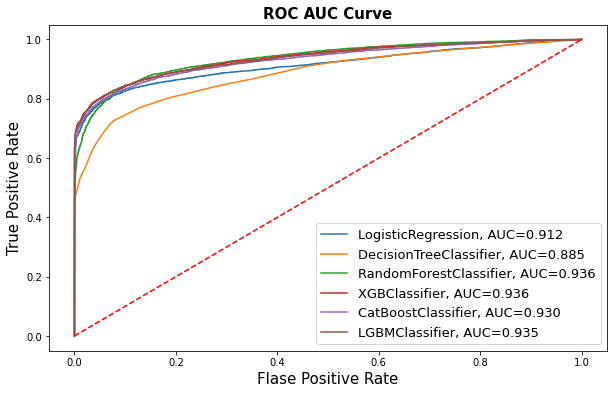

In [142]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()